## Notebook to prepare the GLORYS12V1 data to be able to save the datasets locally

The next step would be to create the datasets for lateral forcing.

In this notebook:
- The seperate files are combined into 1 file


The GLORYS12V1 data is:
- 1993 - 2019
- monthly
- 1/12° x 1/12°

The GLORYS12V1 data is downloaded using the file '/Users/iriskeizer/Documents/ROMS/data/GLORYS12V1/loop_on_glorys_python_script.py'

 

In [1]:
# Import necessary packages

import xarray as xr
import numpy as np
#import xesmf as xe
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib.colors as colors
import cartopy.feature as cfeature
import cartopy.crs as ccrs

ModuleNotFoundError: No module named 'cartopy'

In [7]:
glorys12v1 = xr.open_mfdataset('/projects/0/einf2878/ROMS/data/GLORYS/raw/*.nc')

In [8]:
glorys12v1

,Array,Chunk
Bytes,7.07 GiB,21.55 MiB
Shape,"(336, 50, 313, 361)","(1, 50, 313, 361)"
Count,1008 Tasks,336 Chunks
Type,float32,numpy.ndarray
,Array,Chunk
Bytes,7.07 GiB,21.55 MiB
Shape,"(336, 50, 313, 361)","(1, 50, 313, 361)"
Count,1008 Tasks,336 Chunks
Type,float32,numpy.ndarray
,Array,Chunk


In [9]:
# Convert m to mm
glorys12v1['zos'] = glorys12v1.zos*1000

# Obtain data between 1993 and 2017
glorys12v1 = glorys12v1.where(glorys12v1.time.dt.year < 2018, drop = True)

# Obtain annual averages
glorys12v1 = glorys12v1.groupby('time.year').mean()

# Obtain rate
coef = glorys12v1.zos.polyfit(dim='year', deg=1, full=False)
rate = coef.polyfit_coefficients.sel(degree=1)



In [10]:
p = glorys12v1['zos'].isel(year=-1).plot(x = 'longitude', y = 'latitude',
    subplot_kws=dict(projection=ccrs.Robinson(), facecolor='lightgrey'), 
    transform=ccrs.PlateCarree(),
    cbar_kwargs={'label':'Sea level [m]'},
    robust=True,
    zorder=0)

p.axes.add_feature(cfeature.LAND, facecolor='grey', zorder=1)    
p.axes.coastlines()

NameError: name 'ccrs' is not defined

In [11]:
p = glorys12v1['zos'].isel(year=0).plot(x = 'longitude', y = 'latitude',
    subplot_kws=dict(projection=ccrs.Robinson(), facecolor='lightgrey'), 
    transform=ccrs.PlateCarree(),
    cbar_kwargs={'label':'Sea level [m]'},
    robust=True,
    zorder=0)

p.axes.add_feature(cfeature.LAND, facecolor='grey', zorder=1)    
p.axes.coastlines()

NameError: name 'ccrs' is not defined

In [57]:
plot = glorys12v1['zos'].isel(year=-1) - glorys12v1['zos'].isel(year=0)

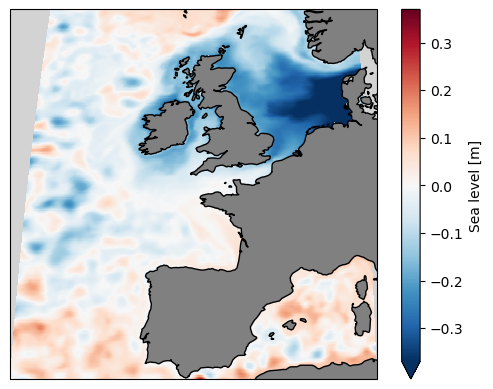

In [48]:
p = plot.plot(x = 'longitude', y = 'latitude',
    subplot_kws=dict(projection=ccrs.Robinson(), facecolor='lightgrey'), 
    transform=ccrs.PlateCarree(),
    cbar_kwargs={'label':'Sea level [m]'},
    robust=True,
    zorder=0)

p.axes.add_feature(cfeature.LAND, facecolor='grey', zorder=1)    
p.axes.coastlines()

### Create trend map from 1993 - 2017

In [9]:
# Import data
ssh_global = xr.open_mfdataset('/Volumes/Iris 300 GB/GLORYS12v1/downloads/global SSH/*.nc')

# Convert m to mm
ssh_global['zos'] = ssh_global.zos*1000


# Obtain data between 1993 and 2017
ssh_global = ssh_global.where(ssh_global.time.dt.year < 2018, drop = True)

# Obtain annual averages
ssh_global = ssh_global.groupby('time.year').mean()

# Obtain rate
coef = ssh_global.zos.polyfit(dim='year', deg=1, full=False)
rate = coef.polyfit_coefficients.sel(degree=1)



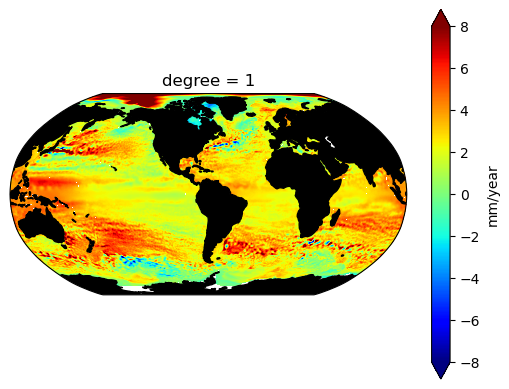

In [10]:
p = rate.plot(
    subplot_kws=dict(projection=ccrs.Robinson(central_longitude=-70), facecolor='white'), 
    cmap = plt.get_cmap('jet'),
    vmin = -8, vmax = 8,
    transform=ccrs.PlateCarree(),
    cbar_kwargs={'label':'mm/year'},
    robust=True,
    zorder=0)

p.axes.add_feature(cfeature.LAND, facecolor='black', zorder=1)    
p.axes.coastlines()

plt.savefig('/Users/iriskeizer/Documents/ROMS/figures/GLORYS/global/glorys_global_trend')

#p.axes.set_extent([lon_min, lon_max, lat_min, lat_max])

## Plot global mean

In [11]:
# Import data
ssh_global2 = xr.open_mfdataset('/Volumes/Iris 300 GB/GLORYS12v1/downloads/global SSH/*.nc')

# Global aviso 
aviso = pd.read_csv('/Users/iriskeizer/Documents/ROMS/data/AVISO/MSL_Serie_MERGED_Global_AVISO_GIA_NoAdjust_Filter2m.txt', sep=' ', names = ['time', 'msl', 'trash'], index_col = 'time', usecols = ['time', 'msl'])

# Convert m to cm
ssh_global2['zos'] = ssh_global2.zos*100
aviso = aviso*100

# 

In [12]:
weights = np.cos(np.deg2rad(ssh_global2.latitude))
weighted = ssh_global2.weighted(weights)

global_mean = weighted.mean(['longitude', 'latitude'])

In [13]:
import pandas as pd
from pandas.tseries.offsets import DateOffset

In [14]:
aviso_datetime = pd.date_range(start='1993/01/01', end='2021/12/31', periods = 1058)

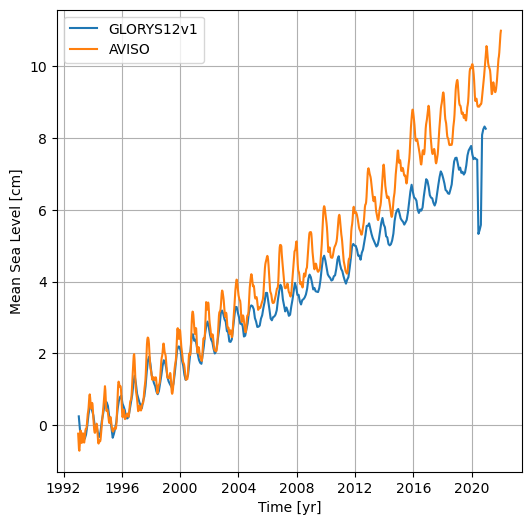

In [15]:
plt.figure(figsize=(6,6))

plt.plot(global_mean.time, global_mean.zos, label = 'GLORYS12v1')
plt.plot(aviso_datetime, aviso['msl'].values, label = 'AVISO')
plt.grid()
plt.legend()
plt.xlabel('Time [yr]')
plt.ylabel('Mean Sea Level [cm]')
plt.savefig('/Users/iriskeizer/Documents/ROMS/figures/GLORYS/global/glorys_aviso_global_mean')



## Correct GLORYS12V1 

We correct the GLORYS12V1 data as it also includes terrestrial water storage and land ice. We obtain these terms from the paper of Thomas Frederikse et al as annual data and correct the monthly data with it. The terms contain a relative sea level (rsl) and radial sea level term (rad) which have to be added for correction.

After those corrections we correct the GLORYS data for the global mean.

In [16]:
# Import data
ssh_global = xr.open_mfdataset('/Volumes/Iris 300 GB/GLORYS12v1/downloads/global SSH/*.nc')
glorys12v1 = xr.open_mfdataset('/Volumes/Iris 300 GB/GLORYS12v1/downloads/*.nc')

# Convert m to mm
ssh_global['zos'] = ssh_global.zos*1000
glorys12v1['zos'] = glorys12v1.zos*1000

### Plot intermediate results

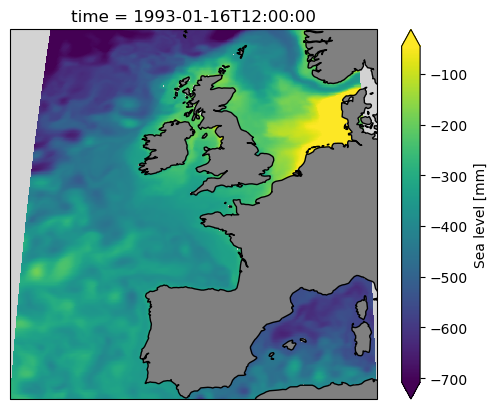

In [17]:
p = glorys12v1.zos.isel(time=0).plot(x = 'longitude', y = 'latitude',
    subplot_kws=dict(projection=ccrs.Robinson(), facecolor='lightgrey'), 
    transform=ccrs.PlateCarree(),
    cbar_kwargs={'label':'Sea level [mm]'},
    robust=True,
    zorder=0)

p.axes.add_feature(cfeature.LAND, facecolor='grey', zorder=1)    
p.axes.coastlines()

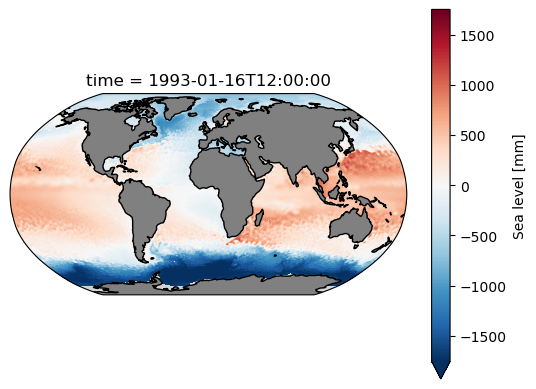

In [18]:
p = ssh_global.zos.isel(time=0).plot(x = 'longitude', y = 'latitude',
    subplot_kws=dict(projection=ccrs.Robinson(), facecolor='lightgrey'), 
    transform=ccrs.PlateCarree(),
    cbar_kwargs={'label':'Sea level [mm]'},
    robust=True,
    zorder=0)

p.axes.add_feature(cfeature.LAND, facecolor='grey', zorder=1)    
p.axes.coastlines()

In [19]:
ais = xr.open_dataset('/Users/iriskeizer/Documents/ROMS/data/Frederikse global budget/AIS.nc')
glac = xr.open_dataset('/Users/iriskeizer/Documents/ROMS/data/Frederikse global budget/glac.nc')
gris = xr.open_dataset('/Users/iriskeizer/Documents/ROMS/data/Frederikse global budget/GrIS.nc')
tws = xr.open_dataset('/Users/iriskeizer/Documents/ROMS/data/Frederikse global budget/tws.nc')

In [20]:
ais_correction = ais.AIS_rsl_mean + ais.AIS_rad_mean
glac_correction = glac.glac_rsl_mean + glac.glac_rad_mean
gris_correction = gris.GrIS_rsl_mean + gris.GrIS_rad_mean
tws_correction = tws.tws_rsl_mean + tws.tws_rad_mean

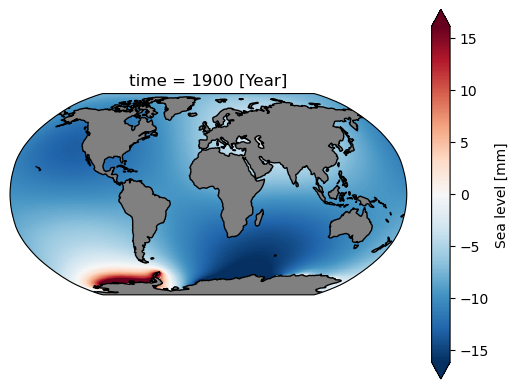

In [21]:
p = ais_correction.isel(time=0).plot(x = 'lon', y = 'lat',
    subplot_kws=dict(projection=ccrs.Robinson(), facecolor='lightgrey'), 
    transform=ccrs.PlateCarree(),
    cbar_kwargs={'label':'Sea level [mm]'},
    robust=True,
    zorder=0)

p.axes.add_feature(cfeature.LAND, facecolor='grey', zorder=1)    
p.axes.coastlines()

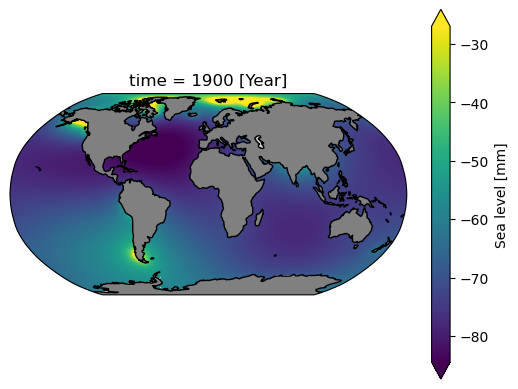

In [22]:
p = glac_correction.isel(time=0).plot(x = 'lon', y = 'lat',
    subplot_kws=dict(projection=ccrs.Robinson(), facecolor='lightgrey'), 
    transform=ccrs.PlateCarree(),
    cbar_kwargs={'label':'Sea level [mm]'},
    robust=True,
    zorder=0)

p.axes.add_feature(cfeature.LAND, facecolor='grey', zorder=1)    
p.axes.coastlines()

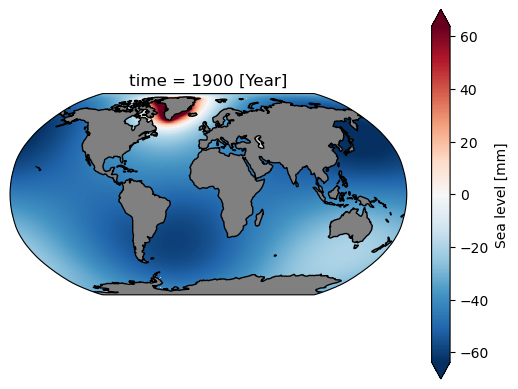

In [23]:
p = gris_correction.isel(time=0).plot(x = 'lon', y = 'lat',
    subplot_kws=dict(projection=ccrs.Robinson(), facecolor='lightgrey'), 
    transform=ccrs.PlateCarree(),
    cbar_kwargs={'label':'Sea level [mm]'},
    robust=True,
    zorder=0)

p.axes.add_feature(cfeature.LAND, facecolor='grey', zorder=1)    
p.axes.coastlines()

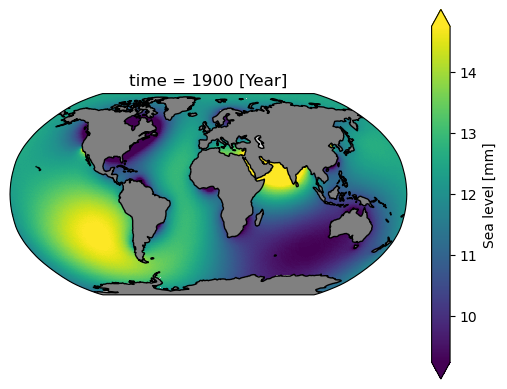

In [24]:
p = tws_correction.isel(time=0).plot(x = 'lon', y = 'lat',
    subplot_kws=dict(projection=ccrs.Robinson(), facecolor='lightgrey'), 
    transform=ccrs.PlateCarree(),
    cbar_kwargs={'label':'Sea level [mm]'},
    robust=True,
    zorder=0)

p.axes.add_feature(cfeature.LAND, facecolor='grey', zorder=1)    
p.axes.coastlines()

In [25]:
correction = ais_correction + glac_correction + gris_correction + tws_correction

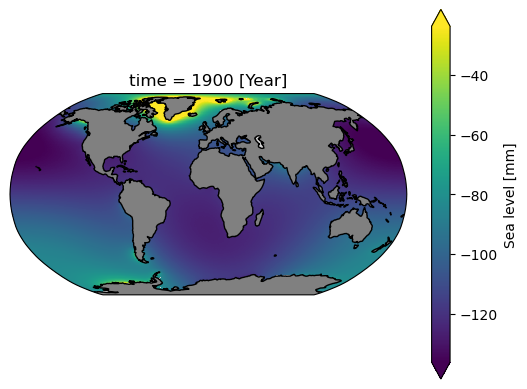

In [26]:
p = correction.isel(time=0).plot(x = 'lon', y = 'lat',
    subplot_kws=dict(projection=ccrs.Robinson(), facecolor='lightgrey'), 
    transform=ccrs.PlateCarree(),
    cbar_kwargs={'label':'Sea level [mm]'},
    robust=True,
    zorder=0)

p.axes.add_feature(cfeature.LAND, facecolor='grey', zorder=1)    
p.axes.coastlines()

## Change correction datasets to be able to use it to correct GLORYS

Remove years before 1993 and after 2018.

Regrid the correction datasets onto the glorys grid.

Change annual data to monthly data containing 12 equal values for a year.

### Remove data before 1993 and linearly interpolate correction data until 2020

Obtain linear trend over period 2009-2018 and add linear interpolation

In [27]:
correction = correction.where(correction.time > 1992, drop = True)

In [28]:
correction_interp = correction.where(correction.time > 2008, drop = True).interp(time = range(1993, 2021), kwargs={"fill_value": "extrapolate"})
correction_interp = correction_interp.where(correction_interp.time > 2018, drop = True)

# Merge the datasets
correction = xr.concat([correction, correction_interp], dim = 'time')

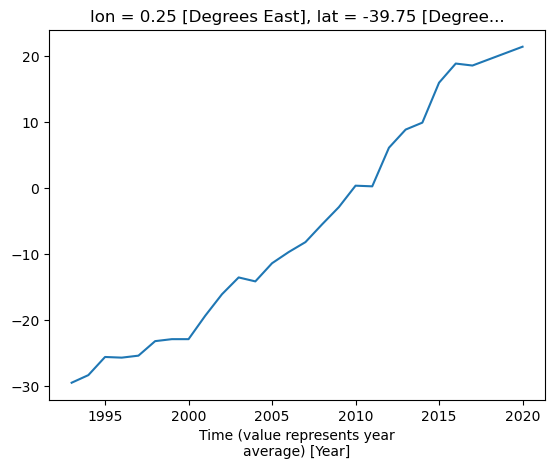

In [29]:
correction.isel(lat=100, lon=0).plot()

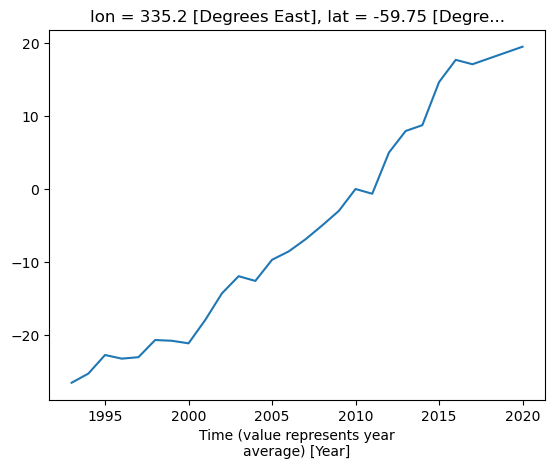

In [30]:
correction.isel(lat=60, lon=-50).plot()

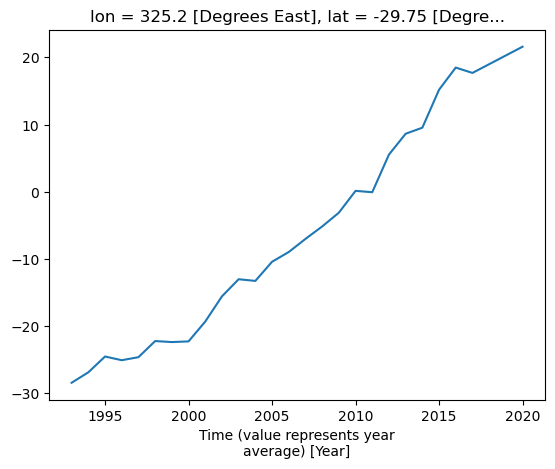

In [31]:
correction.isel(lat=120, lon=-70).plot()

### Create monthly dataset of annual dataset



In [32]:
# Obtain dataset of monthly values
correction_values_monthly = []
for i, year in enumerate(correction.time):
    for j in range(12):
        correction_values_monthly.append(correction[i])

    

# define data with variable attributes
data_vars = {'sea_level_correction':(['time', 'latitude', 'longitude'], correction_values_monthly)}

# define coordinates
coords = {'time': (['time'], ssh_global.time.values),
         'latitude': (['latitude'], correction.lat.values),
         'longitude': (['longitude'], correction.lon.values)}


# create dataset
correction_monthly = xr.Dataset(data_vars=data_vars, coords=coords)



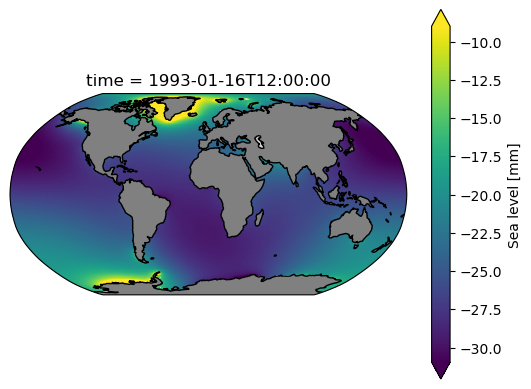

In [33]:
p = correction_monthly.sea_level_correction.isel(time=0).plot(x = 'longitude', y = 'latitude',
    subplot_kws=dict(projection=ccrs.Robinson(), facecolor='lightgrey'), 
    transform=ccrs.PlateCarree(),
    cbar_kwargs={'label':'Sea level [mm]'},
    robust=True,
    zorder=0)

p.axes.add_feature(cfeature.LAND, facecolor='grey', zorder=1)    
p.axes.coastlines()

## Regrid the correction onto the glorys grid

In [34]:
# Sort coordinates in increasing order
ssh_global = ssh_global.sortby(['latitude', 'longitude'])
correction_monthly = correction_monthly.sortby(['latitude', 'longitude'])

# Transpose dimensions
ssh_global = ssh_global.transpose('time', 'latitude', 'longitude')
correction_monthly = correction_monthly.transpose('time', 'latitude', 'longitude')

# Make arrays C_CONTiGUOUS
ssh_global = ssh_global.astype(dtype = 'float32', order = 'C')
correction_monthly = correction_monthly.astype(dtype = 'float32', order = 'C')

# Add mask
ssh_global['mask'] = xr.where(~np.isnan(ssh_global.zos.isel(time=0)), 1, 0)
correction_monthly['mask'] = xr.where(~np.isnan(correction_monthly.sea_level_correction.isel(time=0)), 1, 0)

# Build regridder
regridder = xe.Regridder(correction_monthly, ssh_global, "bilinear", extrap_method= 'nearest_s2d')
    
# Apply to data
correction_monthly_rg = regridder(correction_monthly)
    
# Drop mask
correction_monthly_rg = correction_monthly_rg.drop(['mask'])

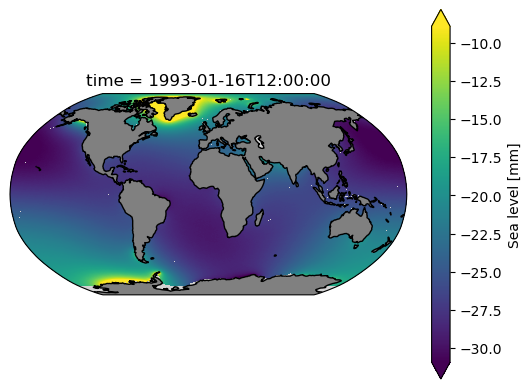

In [35]:
p = correction_monthly_rg.sea_level_correction.isel(time=0).plot(x = 'longitude', y = 'latitude',
    subplot_kws=dict(projection=ccrs.Robinson(), facecolor='lightgrey'), 
    transform=ccrs.PlateCarree(),
    cbar_kwargs={'label':'Sea level [mm]'},
    robust=True,
    zorder=0)

p.axes.add_feature(cfeature.LAND, facecolor='grey', zorder=1)    
p.axes.coastlines()

## Correct both global and nwes glorys data

In [36]:
ssh_global['zos'] = ssh_global['zos'] - correction_monthly_rg['sea_level_correction']

In [37]:
# Select roms region
glorys12v1 = glorys12v1.where((glorys12v1.latitude >= 36) & (glorys12v1.latitude <= 62) & (glorys12v1.longitude >= -20) & (glorys12v1.longitude <= 10), drop = True)
correction_monthly_rg_nwes = correction_monthly_rg.where((correction_monthly_rg.latitude >= 36) & (correction_monthly_rg.latitude <= 62) & (correction_monthly_rg.longitude >= -20) & (correction_monthly_rg.longitude <= 10), drop = True)


In [38]:
glorys12v1['zos'] = glorys12v1['zos'] - correction_monthly_rg_nwes['sea_level_correction'].sel()

## Remove weighted global average from nwes glorys data

In [39]:
weights = np.cos(np.deg2rad(ssh_global.latitude))
weighted = ssh_global.weighted(weights)

global_mean = weighted.mean(['longitude', 'latitude'])

In [40]:
glorys12v1['zos'] = glorys12v1['zos'] - global_mean['zos']

In [41]:
# Change mm to m
glorys12v1['zos'] = glorys12v1.zos/1000

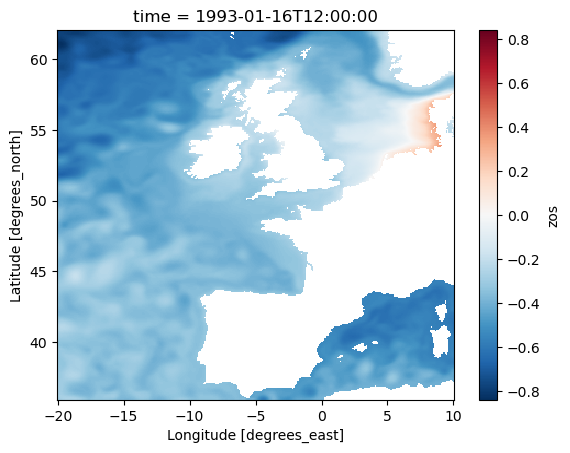

In [43]:
glorys12v1.zos.isel(time=0).plot()

In [47]:
plot = glorys12v1['zos'].isel(time=-1) - glorys12v1['zos'].isel(time=0)

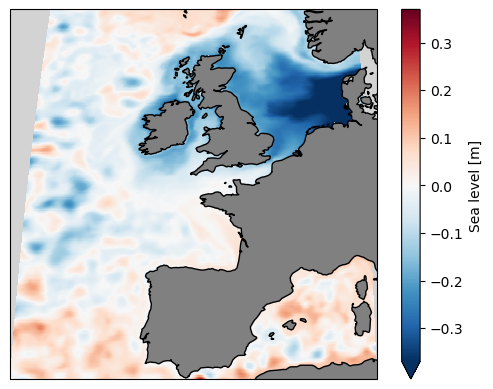

In [48]:
p = plot.plot(x = 'longitude', y = 'latitude',
    subplot_kws=dict(projection=ccrs.Robinson(), facecolor='lightgrey'), 
    transform=ccrs.PlateCarree(),
    cbar_kwargs={'label':'Sea level [m]'},
    robust=True,
    zorder=0)

p.axes.add_feature(cfeature.LAND, facecolor='grey', zorder=1)    
p.axes.coastlines()

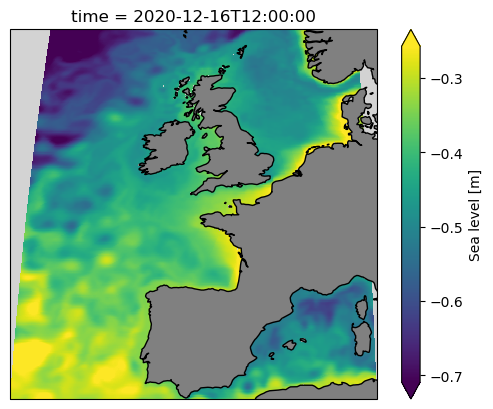

In [49]:
p = glorys12v1['zos'].isel(time=-1).plot(x = 'longitude', y = 'latitude',
    subplot_kws=dict(projection=ccrs.Robinson(), facecolor='lightgrey'), 
    transform=ccrs.PlateCarree(),
    cbar_kwargs={'label':'Sea level [m]'},
    robust=True,
    zorder=0)

p.axes.add_feature(cfeature.LAND, facecolor='grey', zorder=1)    
p.axes.coastlines()

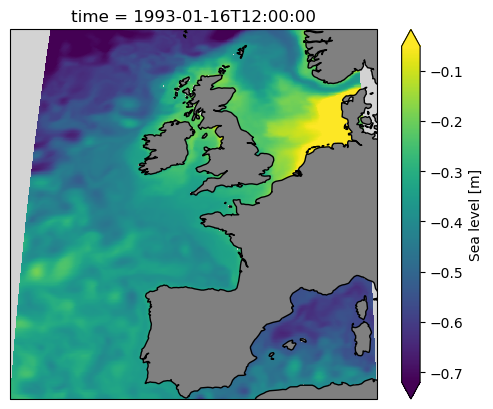

In [50]:
p = glorys12v1['zos'].isel(time=0).plot(x = 'longitude', y = 'latitude',
    subplot_kws=dict(projection=ccrs.Robinson(), facecolor='lightgrey'), 
    transform=ccrs.PlateCarree(),
    cbar_kwargs={'label':'Sea level [m]'},
    robust=True,
    zorder=0)

p.axes.add_feature(cfeature.LAND, facecolor='grey', zorder=1)    
p.axes.coastlines()

## Save data

In [ ]:
glorys12v1.to_netcdf('/Users/iriskeizer/Documents/ROMS/data/GLORYS12V1/processed/glorys.nc')